<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Ebola)

This dataset consists of data for countries with an active Ebola outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of ebola reported from Guinea

**Cases_Liberia**: Number of cases of ebola reported from Liberia

**Cases_SierraLeone**: Number of cases of ebola reported from Sierra Leone

**Cases_Nigeria**: Number of cases of ebola reported from Nigeria

**Cases_Senegal**: Number of cases of ebola reported from Senegal

**Cases_UnitedStates**: Number of cases of ebola reported from the United States of America

**Cases_Spain**: Number of cases of ebola reported from Spain

**Cases_Mali**: Number of cases of ebola reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of ebola from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of ebola from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of ebola from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of ebola from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of ebola from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of ebola from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of ebola from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of ebola from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**
6. **[Outlier Detection Techniques](#out)**
7. **[Treatment of Outliers](#odt)**
8. **[Feature Engineering](#fe)**
9. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.impute import KNNImputer

#### Load the ebola dataset and display the first five records (Use for section 1, 2)

In [6]:
# importing / loading ebola dataset 
dfh=pd.read_csv('house.csv')
ebola=pd.read_csv('malaria.csv')
dfi=pd.read_csv('insurance+(2).csv')
#display first 5 records in dataframe 
ebola.head()

Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
0        2776.0            NaN            10030.0            NaN   
1        2775.0            NaN             9780.0            NaN   
2        2769.0         8166.0             9722.0            NaN   
3           NaN         8157.0                NaN            NaN   
4           NaN            NaN                NaN            NaN   

   Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  Deaths_Guinea  \
0            NaN                 NaN          NaN         NaN         1786.0   
1            NaN                 NaN          NaN         NaN         1781.0   
2            NaN                20.0          NaN         NaN         1767.0   
3            NaN                10.0          NaN         NaN            NaN   
4            NaN                 NaN          NaN         NaN            NaN   

   Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  Deaths_Senegal  \
0             NaN              2977.0             NaN             NaN   
1             NaN              2943.0             NaN             NaN   
2          3496.0              2915.0             NaN             NaN   
3          3496.0                 NaN             NaN             NaN   
4             NaN                 NaN             NaN             NaN   

   Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0                  NaN           NaN          NaN  
1                  NaN           NaN          NaN  
2                  3.0           NaN          NaN  
3                  8.0           NaN          NaN  
4                  NaN           NaN          NaN

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Are there any records where no data has been reported?</b> </div>
                    <b> Find a list of all the columns which have more than 60% of their values missing</b> </div> </div>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
print('missing values are available : ',df.isnull().values.any())
ebola.info()
ebola.isnull().values.any()
# we see a lot of null values lets try to identify and get a percent of how many of them are Null values 
ebola_na_pct = round(ebola.isna().mean()*100,2)
ebola_60pct_na =  list(ebola_na_pct[ebola_na_pct > 60].index)
print(ebola_60pct_na)

missing values are available :  True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cases_Guinea         93 non-null     float64
 1   Cases_Liberia        83 non-null     float64
 2   Cases_SierraLeone    87 non-null     float64
 3   Cases_Nigeria        38 non-null     float64
 4   Cases_Senegal        25 non-null     float64
 5   Cases_UnitedStates   73 non-null     float64
 6   Cases_Spain          16 non-null     float64
 7   Cases_Mali           12 non-null     float64
 8   Deaths_Guinea        92 non-null     float64
 9   Deaths_Liberia       81 non-null     float64
 10  Deaths_SierraLeone   87 non-null     float64
 11  Deaths_Nigeria       38 non-null     float64
 12  Deaths_Senegal       22 non-null     float64
 13  Deaths_UnitedStates  57 non-null     float64
 14  Deaths_Spain         16 non-null     float64
 15  Dea

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

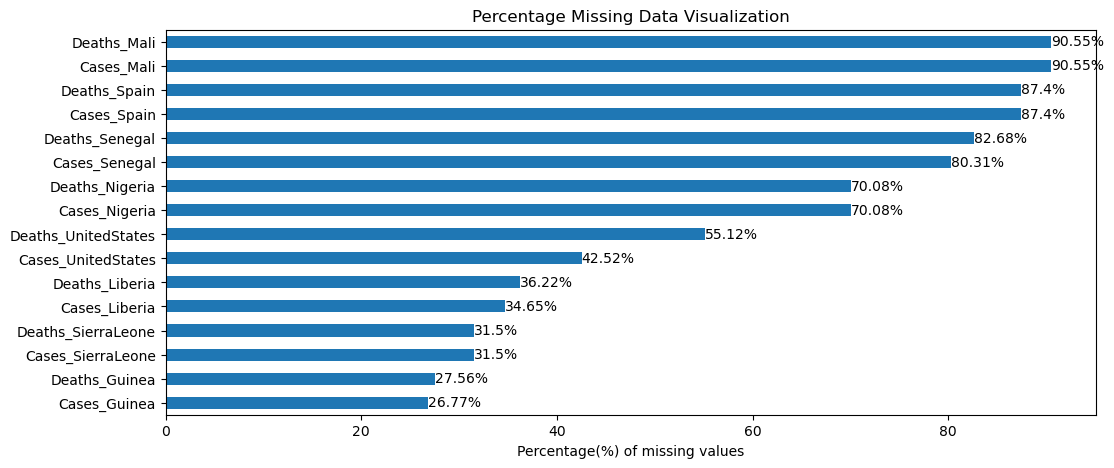

In [8]:
# type your code here

plt.figure(figsize=(12,5))
ebola_na_pct.sort_values().plot(kind='barh')
plt.xlabel("Percentage(%) of missing values")
plt.title('Percentage Missing Data Visualization')

for i, val in enumerate(ebola_na_pct.sort_values()):
    plt.text(val, i, str(val)+'%', va='center', fontsize=10, color='black')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
ebola.isna().sum().sort_values().plot(kind='barh')
plt.xlabel("Percentage(%) of missing values")
plt.title('Number of Missing Data Visualization')

for i, val in enumerate(ebola.isna().sum().sort_values()):
    plt.text(val, i, str(val), va='center', fontsize=10, color='black')
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Treat the missing values with appropriate method and justify.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:


ebola_na_pct = round(ebola.isna().mean()*100,2)
threshold = 60

#Step1)dropping all the columns having missing value %age more than the threshold(60% in this case)
cols_to_drop = list(ebola_na_pct[ebola_na_pct > threshold].index)

ebola_na_treated = ebola.drop(columns=cols_to_drop)
ebola_na_treated.head()

Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_UnitedStates  \
0        2776.0            NaN            10030.0                 NaN   
1        2775.0            NaN             9780.0                 NaN   
2        2769.0         8166.0             9722.0                20.0   
3           NaN         8157.0                NaN                10.0   
4           NaN            NaN                NaN                 NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_UnitedStates  
0         1786.0             NaN              2977.0                  NaN  
1         1781.0             NaN              2943.0                  NaN  
2         1767.0          3496.0              2915.0                  3.0  
3            NaN          3496.0                 NaN                  8.0  
4            NaN             NaN                 NaN                  NaN

In [14]:
#step 2) Using Knn imputation since all these features are numerical.
knn = KNNImputer(n_neighbors=3)
imputed_date = knn.fit_transform(ebola_na_treated)

ebola_na_treated[ebola_na_treated.columns] = imputed_date
ebola_na_treated = ebola_na_treated.round()
ebola_na_treated.head()


Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_UnitedStates  \
0        2776.0         8100.0            10030.0                15.0   
1        2775.0         8100.0             9780.0                15.0   
2        2769.0         8166.0             9722.0                20.0   
3        1623.0         8157.0             4010.0                10.0   
4         911.0         2335.0             2427.0                14.0   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_UnitedStates  
0         1786.0          3463.0              2977.0                  7.0  
1         1781.0          3463.0              2943.0                  7.0  
2         1767.0          3496.0              2915.0                  3.0  
3          949.0          3496.0              1184.0                  8.0  
4          563.0          1101.0               694.0                  9.0

In [15]:
ebola_na_treated.isna().sum()

Cases_Guinea           0
Cases_Liberia          0
Cases_SierraLeone      0
Cases_UnitedStates     0
Deaths_Guinea          0
Deaths_Liberia         0
Deaths_SierraLeone     0
Deaths_UnitedStates    0
dtype: int64

## For new few questions , we shall consider the following dataset.

In [16]:
insure = pd.read_csv("insurance+(2).csv")
insure.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [17]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### About the dataset (Insurance Data)

The dataset contains information about 1338 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on.

Attribute Information:

**age**: Age of the individual

**sex**: Gender of the individual

**bmi**: Body mass index of the individual

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**charges**: Individual's medical costs billed by the insurance company

#### Load the house dataset and display the first five records (Use for section 3 to 6)

#### Import the required libraries

In [ ]:
# type your code here

#### Load the iris dataset and print the first five observations

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Create a dummy variable for each category in 'region'
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
insure_dummy = pd.concat([insure,pd.get_dummies(data= insure['region'],prefix='region')],axis=1).drop(columns=['region'])
insure_dummy

age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400                 0   
1      18    male  33.770         1     no   1725.55230                 0   
2      28    male  33.000         3     no   4449.46200                 0   
3      33    male  22.705         0     no  21984.47061                 0   
4      32    male  28.880         0     no   3866.85520                 0   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830                 0   
1334   18  female  31.920         0     no   2205.98080                 1   
1335   18  female  36.850         0     no   1629.83350                 0   
1336   21  female  25.800         0     no   2007.94500                 0   
1337   61  female  29.070         0    yes  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 10 columns]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
label_encoder = LabelEncoder()
insure['smoker_label'] = label_encoder.fit_transform(insure['smoker'])

unique_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Unique labels for 'smoker' column:")
print(unique_labels)

insure

Unique labels for 'smoker' column:
{'no': 0, 'yes': 1}


age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_label  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
1333             0  
1334             0  
1335             0  
1336             0  
1337             1  

[1338 rows x 8 columns]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
gender_frequency = insure['sex'].value_counts()

print("Frequency of each gender:")
print(gender_frequency)

Frequency of each gender:
male      676
female    662
Name: sex, dtype: int64


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
scalar = StandardScaler()
insure['bmi_scaled'] = scalar.fit_transform(insure[['bmi']])
insure.head()

In [21]:
print(f"The mean of BMI = {insure['bmi'].mean():.2f} and variance = {insure['bmi'].var():.2f}")

The mean of BMI = 30.66 and variance = 37.19


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the range of 'age' and transform the values such that the range will be 0 to 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
print("Range of 'age':", insure['age'].min(), "-", insure['age'].max())
scaler = MinMaxScaler()

insure['age_normalized'] = scaler.fit_transform(insure[['age']])
print("Range of 'age_normalized':", insure['age_normalized'].min(), "-", insure['age_normalized'].max())
insure.head()

Range of 'age': 18 - 64
Range of 'age_normalized': 0.0 - 1.0


age     sex     bmi  children smoker     region      charges  smoker_label  \
0   19  female  27.900         0    yes  southwest  16884.92400             1   
1   18    male  33.770         1     no  southeast   1725.55230             0   
2   28    male  33.000         3     no  southeast   4449.46200             0   
3   33    male  22.705         0     no  northwest  21984.47061             0   
4   32    male  28.880         0     no  northwest   3866.85520             0   

   age_normalized  
0        0.021739  
1        0.000000  
2        0.217391  
3        0.326087  
4        0.304348

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the skewness for 'charges'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness of 'charges' column: 1.51


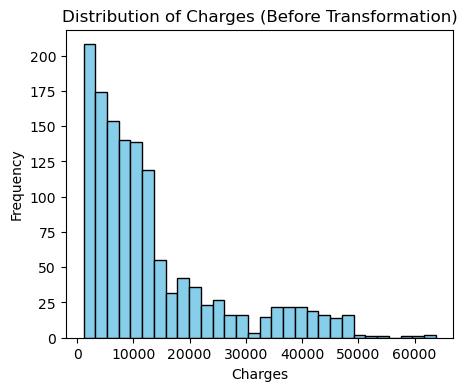

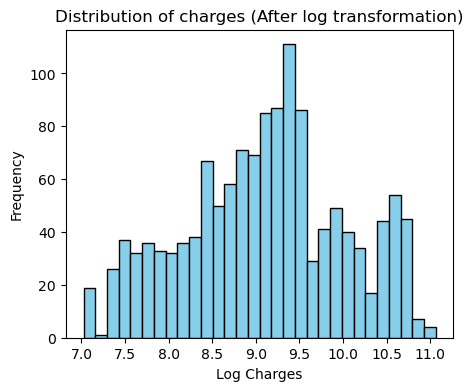

Skewness of 'Log_charges' column: -0.09


In [23]:
# type your code here
charges_skewness = skew(insure['charges'])
print(f"Skewness of 'charges' column: {charges_skewness:.2f}")

plt.figure(figsize=(5, 4))
plt.hist(insure['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charges (Before Transformation)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


if charges_skewness > 1:
    insure['log_charges'] = np.log1p(insure['charges'])
    log_charge_skewness = skew(insure['log_charges'])
    
    plt.figure(figsize=(5,4))
    plt.hist(insure['log_charges'], bins = 30, color = 'skyblue' , edgecolor = 'black')
    plt.title('Distribution of charges (After log transformation)')
    plt.xlabel('Log Charges')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f"Skewness of 'Log_charges' column: {log_charge_skewness:.2f}")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Transform the 'log_charges' values to the original scale and compare the 'charges' and the transformed data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

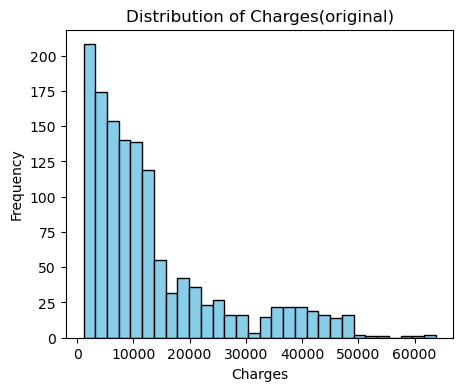

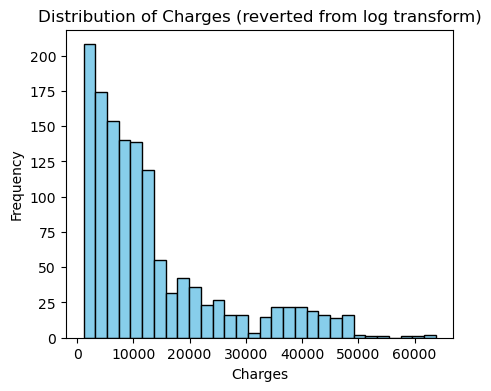

In [24]:
# type your code here
insure['charges_reverted'] = np.expm1(insure['log_charges'])

plt.figure(figsize=(5, 4))
plt.hist(insure['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charges(original)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(insure['charges_reverted'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charges (reverted from log transform)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Import the required libraries

In [ ]:
# type your code here
#already done 

#### Load the iris dataset and print the first five observations

In [26]:
# type your code here
house = pd.read_csv("house.csv")
house.head()

Rooms Type    Price Method             Regionname  Bathroom  Car  Landsize  \
0      3    h  1490000      S  Northern Metropolitan         1    1       126   
1      3    h  1220000      S  Northern Metropolitan         1    1       202   
2      3    h  1420000      S  Northern Metropolitan         1    0       156   
3      3    h  1515000      S   Western Metropolitan         2    1         0   
4      2    h   670000      S   Western Metropolitan         2    0       134   

   Distance  Bedroom  
0      25.2        2  
1      21.8        2  
2      21.7        2  
3      18.8        3  
4      20.6        3

In [27]:
house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

#### Load the house dataset and display the first five records (Use for section 6 to 9)

<a id="out"> </a>
## 6. Outlier Detection Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
cat_cols = list(house.select_dtypes(include='object').columns)
print(f"The features that can be exempted from outlier treatment are the categorical features = {cat_cols}")

The features that can be exempted from outlier treatment are the categorical features = ['Type', 'Method', 'Regionname']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How do we detect the outliers present in the dataset. Please mention the names of the attributes where outliers are present. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

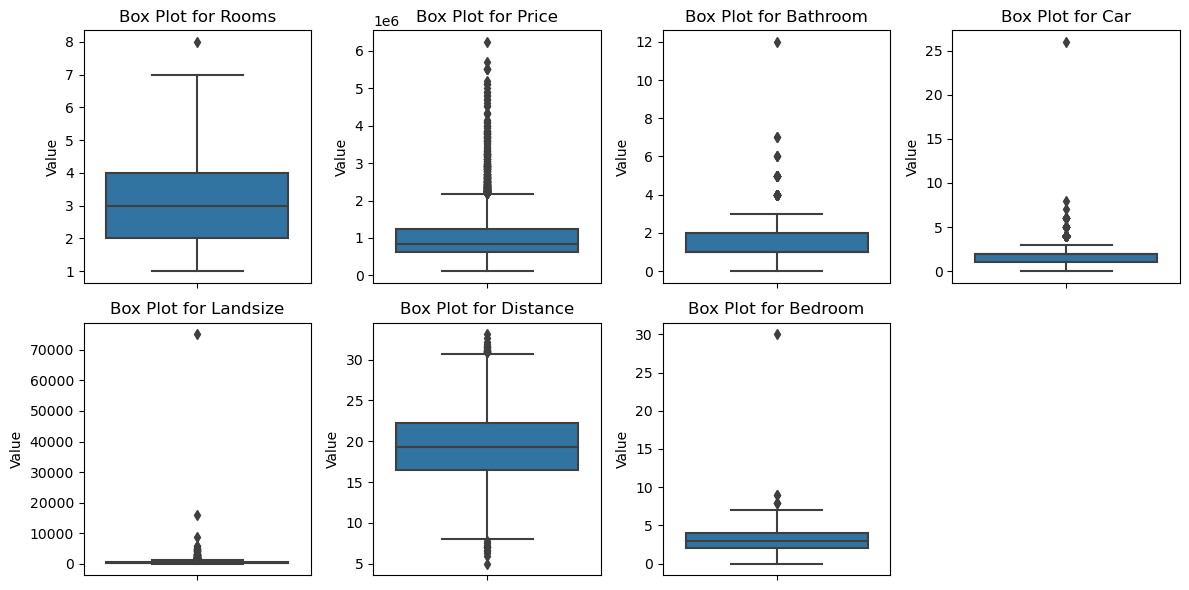

Points lying beyond the whiskers are outliers , hence we can say all the numerical colums['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Bedroom'] have outliers.


In [29]:
# type your code here
#box plot method
num_cols = list(house.select_dtypes(include = ['int64','float64']).columns)

plt.figure(figsize=(12,6))
for i,cols in enumerate(num_cols,1):
    plt.subplot(2,4,i)
    sns.boxplot(data = house, y = cols)
    plt.title(f'Box Plot for {cols}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()
print(f"Points lying beyond the whiskers are outliers , hence we can say all the numerical colums{num_cols} have outliers.")

In [30]:
#IQR method
for cols in num_cols:
    q1 = house[cols].quantile(0.25)
    q3 = house[cols].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = house[(house[cols] < lower_bound) | (house[cols] > upper_bound)]
    print(f"\nNumber of Outliers in {cols} = {len(outliers)} \n{list(outliers[cols])}")


Number of Outliers in Rooms = 1 
[8]

Number of Outliers in Price = 253 
[2600000, 2470000, 3000000, 2250000, 2975000, 2410000, 4000000, 4150000, 2250000, 2985000, 3259000, 3730000, 2288500, 2315000, 2400000, 3105000, 5000000, 3250000, 2345000, 5200000, 3050000, 3250000, 2705000, 2200000, 2200000, 2450000, 2530000, 2200000, 2800000, 2420000, 2850500, 2800000, 4000000, 2255000, 3590000, 2500000, 2500000, 2500000, 2200000, 2330000, 2245000, 2235000, 2450000, 2625000, 2225000, 3845000, 2435000, 2450000, 5700000, 2350000, 2579500, 2280000, 2325000, 2695000, 3800000, 2260000, 3680000, 4700000, 3150000, 2320000, 2550000, 2450000, 2560000, 2610000, 2910000, 2720000, 2400000, 2220000, 4100000, 2405000, 3100000, 2250000, 2960000, 3050000, 2600000, 2210000, 2268000, 5510000, 3335000, 2320000, 2525000, 4900000, 2355000, 2265000, 2300000, 2221000, 2400000, 2760000, 3230000, 2650000, 3225000, 2950000, 3400000, 3730000, 2800000, 3250000, 4800000, 6240000, 2490000, 2500000, 3850000, 2600000, 2920000

<a id="odt"> </a>
## 7. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
avg_dist_before = house['Distance'].mean()


q1 = house['Distance'].quantile(0.25)
q3 = house['Distance'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

house['distance_iqr_treated'] = house['Distance'].mask((house['Distance'] < lower_bound) | (house['Distance'] > upper_bound))

avg_dist_after = house['distance_iqr_treated'].mean()
diff_avg = avg_dist_after - avg_dist_before

print(f"Average Distance Before Handling Outliers: {avg_dist_before:.2f}")
print(f"Average Distance After Handling Outliers: {avg_dist_after:.2f}")
print(f"\nChange in Average Distance: {diff_avg:.2f}")

Average Distance Before Handling Outliers: 19.33
Average Distance After Handling Outliers: 19.31

Change in Average Distance: -0.02


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:

# type your code here
k_range = np.arange(1.5,4,0.5)
print(f"Minimum  price : {house['Price'].min()} , Maximum Price : {house['Price'].max()}")

for k in k_range:
    q1 = house['Price'].quantile(0.25)
    q3 = house['Price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    outliers = house[(house['Price'] < lower_bound) | (house['Price'] > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"For K = {k} ({k}*IQR):")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {num_outliers}")
    print("---------------------------------------")

Minimum  price : 112000 , Maximum Price : 6240000
For K = 1.5 (1.5*IQR):
Lower Bound: -316375.00, Upper Bound: 2180625.00
Number of outliers: 253
---------------------------------------
For K = 2.0 (2.0*IQR):
Lower Bound: -628500.00, Upper Bound: 2492750.00
Number of outliers: 147
---------------------------------------
For K = 2.5 (2.5*IQR):
Lower Bound: -940625.00, Upper Bound: 2804875.00
Number of outliers: 102
---------------------------------------
For K = 3.0 (3.0*IQR):
Lower Bound: -1252750.00, Upper Bound: 3117000.00
Number of outliers: 70
---------------------------------------
For K = 3.5 (3.5*IQR):
Lower Bound: -1564875.00, Upper Bound: 3429125.00
Number of outliers: 52
---------------------------------------


<a id="fe"> </a>
## 8. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

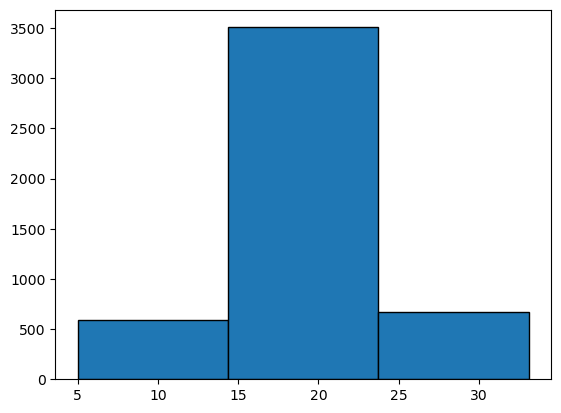

In [33]:
# type your code here
plt.hist(data=house, x='Distance',bins=3,edgecolor= 'black')
plt.show()

In [34]:
def distance_category(distance):
    if distance <= 10:
        return 'Nearby'
    elif distance <= 20:
        return 'Midrange'
    else:
        return 'Far'

house['distance_category'] = house['Distance'].apply(distance_category)

house[['Distance', 'distance_category']].head(10)


Distance distance_category
0      25.2               Far
1      21.8               Far
2      21.7               Far
3      18.8          Midrange
4      20.6               Far
5      17.5          Midrange
6      21.3               Far
7      19.9          Midrange
8      23.2               Far
9      18.8          Midrange

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Compare the house prices based on the different distance levels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here

price_distance_category = house.groupby(by='distance_category')['Price'].agg(['mean','median','min','max'])

<a id="split"> </a>
## 9. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Split the price of houses in the proportion 80:20
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
price = house['Price']

train_price, test_price = train_test_split(price,test_size=0.2, random_state=23)


print(f"Size of Price: {len(price)}")
print(f"Size of Train Price: {len(train_price)} & proportion size = {(len(train_price)/len(price))*100 :.0f}%")
print(f"Size of Test price: {len(test_price)} & proportion size = {(len(test_price)/len(price))*100 :.0f}%")

Size of Price: 4766
Size of Train Price: 3812 & proportion size = 80%
Size of Test price: 954 & proportion size = 20%
